# COGS 108 - EDA Checkpoint

# Names

- Hugs Clorina
- John Howell
- Andy Chow
- Jawad Osman
- Vince Ermitano

<a id='research_question'></a>
# Research Question

Is there a statistically significant correlation between rising ocean temperature and sea level with the frequency of unprovoked shark attacks in North America?

# Setup

In [3]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# import pandas & numpy library
import pandas as pd
import numpy as np

In [4]:
# read in all datasets
sharks_df = pd.read_csv("./shark_attacks.csv")
temp_df = pd.read_csv("./temperature_anomalies.csv")
sl_pacific_df = pd.read_csv("./sea_level_north_pacific.csv")
sl_atlantic_df = pd.read_csv("./sea_level_north_atlantic.csv")

# Data Cleaning

## Shark attack

The data that needs the most cleaning work done is the shark attack data because
- it contains columns that are irrelevant to our research or revealed personal information
- it contains shark attacks in regions/areas of the world that are not relevant to our scope.
- it contains rows for *provoked* shark attacks when we are really trying to research relative to *unprovoked* shark attacks
- it is missing categorization of areas of attacks between East and West Coast

Thus, pertaining to the shark attack data, we cleaned up our data as follows:
1. read in the shark attack csv file
2. filtered the dataset to only areas that we of interest (North America)
    * looked at all unique values for countries
    * defined which of these values to retain
    * dropped rows for values in which don't exist in our area of interest
3. filtered the dataset to only include rows that had their 'Type' column value as 'unprovoked'
4. dropped columns that were either irrelevant or included personal data
5. categorized the areas into East and West Coast appropriately

In [5]:
# get a feel for the data
print(sharks_df.shape)
print(sharks_df.columns)

(25847, 24)
Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


In [6]:
# look at all unique countries
print(sharks_df['Country'].unique())

# filter by area, unprovoked attacks, and relevant year frame
sharks_df = sharks_df[sharks_df['Country'] == 'USA']
sharks_df = sharks_df[sharks_df['Type'] == 'Unprovoked']
sharks_df = sharks_df[sharks_df['Year'] >= 1880]

# drop irrelevant or ethically exposing columns
sharks_df = sharks_df.drop(columns=['Investigator or Source', 'Injury', 'Time', 'pdf','Species ', 'href formula', 'Name', 'Unnamed: 22', 'Unnamed: 23', 'Case Number.1', 'Case Number.2', 'href', 'original order']).reset_index(drop=True)

['USA' 'BAHAMAS' 'AUSTRALIA' 'SOUTH AFRICA' 'ENGLAND' 'JAPAN' 'INDONESIA'
 'EGYPT' 'JA MAICA' 'BELIZE' 'MALDIVES' 'FRENCH POLYNESIA' 'THAILAND'
 'COLUMBIA' 'NEW ZEALAND' 'MEXICO' 'COSTA RICA' 'New Zealand' 'BRAZIL'
 'British Overseas Territory' 'CANADA' 'ECUADOR' 'JORDAN' 'NEW CALEDONIA'
 'JAMAICA' 'ST KITTS / NEVIS' 'ST MARTIN' 'SPAIN' 'FIJI' 'SEYCHELLES'
 'PAPUA NEW GUINEA' 'REUNION ISLAND' 'ISRAEL' 'CHINA' 'SAMOA' 'IRELAND'
 'ITALY' 'COLOMBIA' 'MALAYSIA' 'LIBYA' nan 'CUBA' 'MAURITIUS'
 'SOLOMON ISLANDS' 'ST HELENA, British overseas territory' 'COMOROS'
 'REUNION' 'UNITED KINGDOM' 'UNITED ARAB EMIRATES' 'PHILIPPINES'
 'CAPE VERDE' 'Fiji' 'DOMINICAN REPUBLIC' 'CAYMAN ISLANDS' 'ARUBA'
 'MOZAMBIQUE' 'PUERTO RICO' 'ATLANTIC OCEAN' 'GREECE' 'ST. MARTIN'
 'FRANCE' 'TRINIDAD & TOBAGO' 'KIRIBATI' 'DIEGO GARCIA' 'TAIWAN'
 'PALESTINIAN TERRITORIES' 'GUAM' 'NIGERIA' 'TONGA' 'SCOTLAND' 'CROATIA'
 'SAUDI ARABIA' 'CHILE' 'ANTIGUA' 'KENYA' 'RUSSIA' 'TURKS & CAICOS'
 'UNITED ARAB EMIRATES (UAE)' 'AZ

In [7]:
# categorize 'Area' column values to 'East Coast' or 'West Coast'
print(sharks_df['Area'].unique())

west_coast = ['California', 'Hawaii', 'Texas', 'Oregon', 'Guam', 'Maui', 'Baja ', 'Guerrero',
              'Washington', 'Baja California Sur', 'Palmyra Atoll', 'Johnston Atoll', 'Midway Atoll']

east_coast = ['Louisiana', 'South Carolina', 'Florida','New York', 'Noirth Carolina', 'Alabama',
              'Maryland', 'North Carolina', 'Georgia', 'Franklin County, Florida', 'Virgin Islands',
              'Maine', 'Bahamas', 'Cayman Islands', 'Rhode Island', 'New Jersey', 'Massachusetts', 'Delaware',
              'Virginia', 'Puerto Rico', 'US Virgin Islands', 'South Carolina ', 'Connecticut', 'Mississippi',
              'Wake Island', ' North Carolina', 'East coast']

['California' 'Hawaii' 'Louisiana' 'South Carolina' 'Florida' 'New York'
 'Noirth Carolina' 'Alabama' 'Texas' 'Maryland' 'North Carolina' 'Georgia'
 'Oregon' 'Franklin County, Florida' 'Virgin Islands' 'Maine' 'Bahamas'
 'Maui' 'Guam' 'Cayman Islands' 'Rhode Island' 'New Jersey'
 'Massachusetts' 'Washington' 'Delaware' 'Palmyra Atoll' 'Puerto Rico'
 'Virginia' 'US Virgin Islands' 'South Carolina ' 'Johnston Atoll'
 'Connecticut' 'Mississippi' 'Wake Island' ' North Carolina'
 'Midway Atoll' 'East coast']


In [8]:
def categorize_east_west(str_in):
    if str_in in west_coast:
        return 'West Coast'
    return 'East Coast'

sharks_df['West/East Coast'] = sharks_df['Area'].apply(categorize_east_west)

In [9]:
# take a look at our cleaned-up shark data
sharks_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N),West/East Coast
0,2022.10.31,31-Oct-2022,2022.0,Unprovoked,USA,California,"Otter Point, Pacific Grove",Surfing,M,NaN,N,West Coast
1,2022.10.25,25 Oct-2022,2022.0,Unprovoked,USA,Hawaii,Kauai,Snorkeling,M,51,N,West Coast
2,2022.10.08,08-Oct-2022,2022.0,Unprovoked,USA,Louisiana,25 miles off Empire,Shipwreck,M,40,N,East Coast
3,2022.010.02,02-Oct-2022,2022.0,Unprovoked,USA,California,Centerville Beach,Surfing,M,31,N,West Coast
4,2022.09.03,03-Sep-2022,2022.0,Unprovoked,USA,Hawaii,"Lower Paia Beach Park, Maui",Swimming or Snorkeling,F,51,N,West Coast


## Ocean temperature anomalies

For the remaining datasets (sea_level & temperature_anomalies), most of the data we already clean so we only made the following changes:
1. Removed first 4 rows in the ocean temperature dataset because it stored irrelevant data.
2. The intial column names in the ocean temperature dataset did not make sense for the values that are stored, so we changed the column names to appropriate titles (Year, Temperature Anomaly (Celsius))

In [10]:
# get a feel for the data
print(temp_df.shape)
print(temp_df.columns)

temp_df.head()

(146, 2)
Index(['Northern Hemisphere Ocean Temperature Anomalies', ' January-December'], dtype='object')


,Northern Hemisphere Ocean Temperature Anomalies,January-December
0,Units: Degrees Celsius,NaN
1,Base Period: 1901-2000,NaN
2,Missing: -999,NaN
3,Year,Value
4,1880,-0.02


In [11]:
# need to remove unnecessary initial rows (0-4)
temp_df = temp_df.loc[4:].reset_index(drop=True)

# rename column titles appropriately
temp_df = temp_df.rename(columns={'Northern Hemisphere Ocean Temperature Anomalies': 'Year', ' January-December': 'Temperature Anomaly (Celsius)'})

temp_df.head()

,Year,Temperature Anomaly (Celsius)
0,1880,-0.02
1,1881,-0.02
2,1882,-0.03
3,1883,-0.08
4,1884,-0.16


## Sea Level

The sea level data we already clean, so we just read the dataset in with no modifications

In [12]:
# northern pacific sea level data
print(sl_pacific_df.shape)
sl_pacific_df.head()

(1375, 5)


,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3
0,1992.9611,19.62,NaN,NaN,NaN
1,1992.9865,-8.28,NaN,NaN,NaN
2,1993.0126,-16.68,NaN,NaN,NaN
3,1993.0408,-43.48,NaN,NaN,NaN
4,1993.0659,-61.18,NaN,NaN,NaN


In [13]:
# northern atlantic sea level data
print(sl_atlantic_df.shape)
sl_atlantic_df.head()

(1378, 5)


,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3
0,1992.9620,-0.32,NaN,NaN,NaN
1,1992.9873,-0.62,NaN,NaN,NaN
2,1993.0129,-16.42,NaN,NaN,NaN
3,1993.0413,-8.52,NaN,NaN,NaN
4,1993.0667,-35.72,NaN,NaN,NaN


In [14]:
# While decimal year is useful for linear regression, we want to add a column of dates for easier reading
from datetime import datetime, timedelta

def decimal_year_to_date(year_in):
    year_out = int(year_in)
    year_begin = datetime(year_out, 1, 1)
    year_end = datetime(year_out + 1, 1, 1)
    fraction = year_in - year_out
    result = year_begin + timedelta(seconds=(year_end - year_begin).total_seconds() * fraction)
    return result.date()

In [15]:
assert decimal_year_to_date(2022.5) == datetime(2022, 7, 2).date()
assert decimal_year_to_date(1997) == datetime(1997, 1, 1).date()
assert decimal_year_to_date(2005.6384) == datetime(2005, 8, 22).date()

In [16]:
pacific_col = sl_pacific_df['year'].apply(decimal_year_to_date)
sl_pacific_df.insert (0, "date", pacific_col)

atlantic_col = sl_atlantic_df['year'].apply(decimal_year_to_date)
sl_atlantic_df.insert (0, "date", atlantic_col)

sl_pacific_df.head()

,date,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3
0,1992-12-17,1992.9611,19.62,NaN,NaN,NaN
1,1992-12-27,1992.9865,-8.28,NaN,NaN,NaN
2,1993-01-05,1993.0126,-16.68,NaN,NaN,NaN
3,1993-01-15,1993.0408,-43.48,NaN,NaN,NaN
4,1993-01-25,1993.0659,-61.18,NaN,NaN,NaN


In [17]:
sl_atlantic_df.head()

,date,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3
0,1992-12-18,1992.9620,-0.32,NaN,NaN,NaN
1,1992-12-27,1992.9873,-0.62,NaN,NaN,NaN
2,1993-01-05,1993.0129,-16.42,NaN,NaN,NaN
3,1993-01-16,1993.0413,-8.52,NaN,NaN,NaN
4,1993-01-25,1993.0667,-35.72,NaN,NaN,NaN


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [24]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
sharks_df.describe()


,Year
count,1860.000000
mean,1992.093011
std,29.851334
min,1881.000000
25%,1983.000000
50%,2002.000000
75%,2013.000000
max,2022.000000


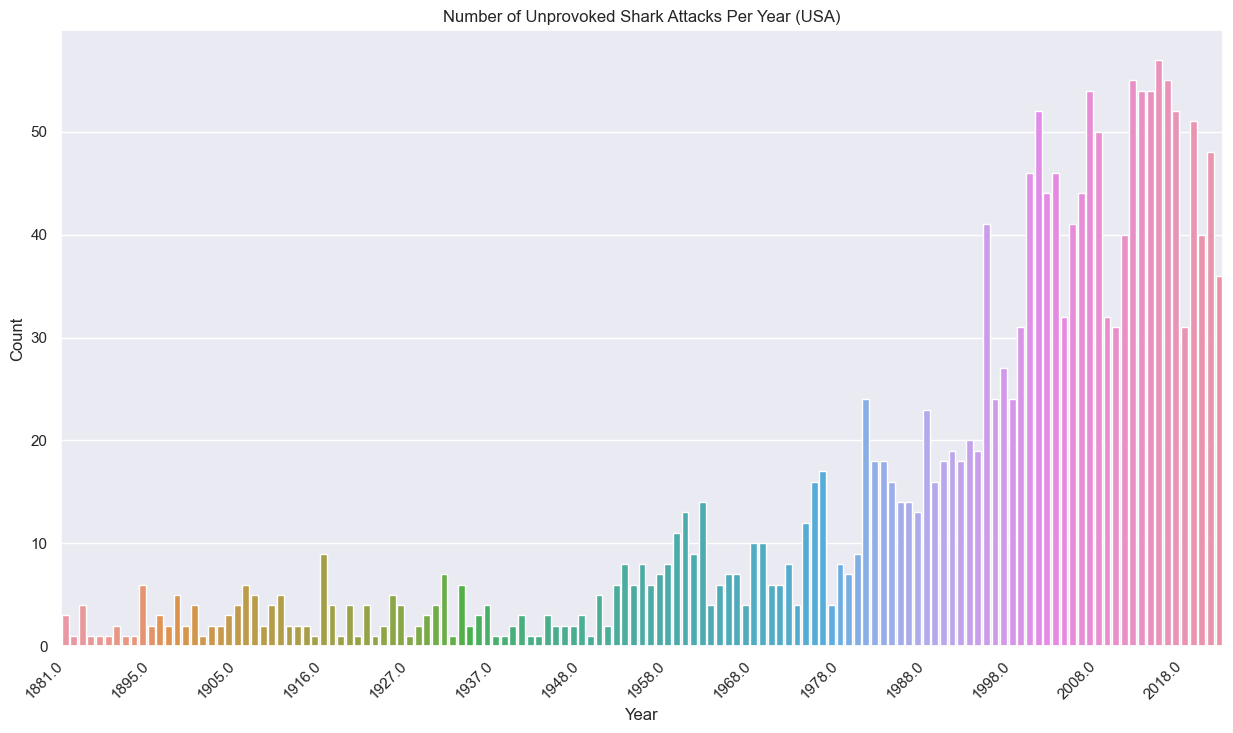

In [75]:
# We can see the number of reported shark attacks has increased over the years
ax = sns.countplot(data=sharks_df, x='Year')

# make countplot look more presentable
ax.set(title='Number of Unprovoked Shark Attacks Per Year (USA)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count')
sns.set(rc = {'figure.figsize':(15,8)})

# clean up x tick labels
n = 10
[l.set_visible(False) for (i, l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

sns.set(rc = {'figure.figsize':(15,8)})

In [76]:
temp_df.describe()


,Year,Temperature Anomaly (Celsius)
count,142,142
unique,142,81
top,1880,-0.02
freq,1,6


Text(0, 0.5, 'Temperature Anomaly')

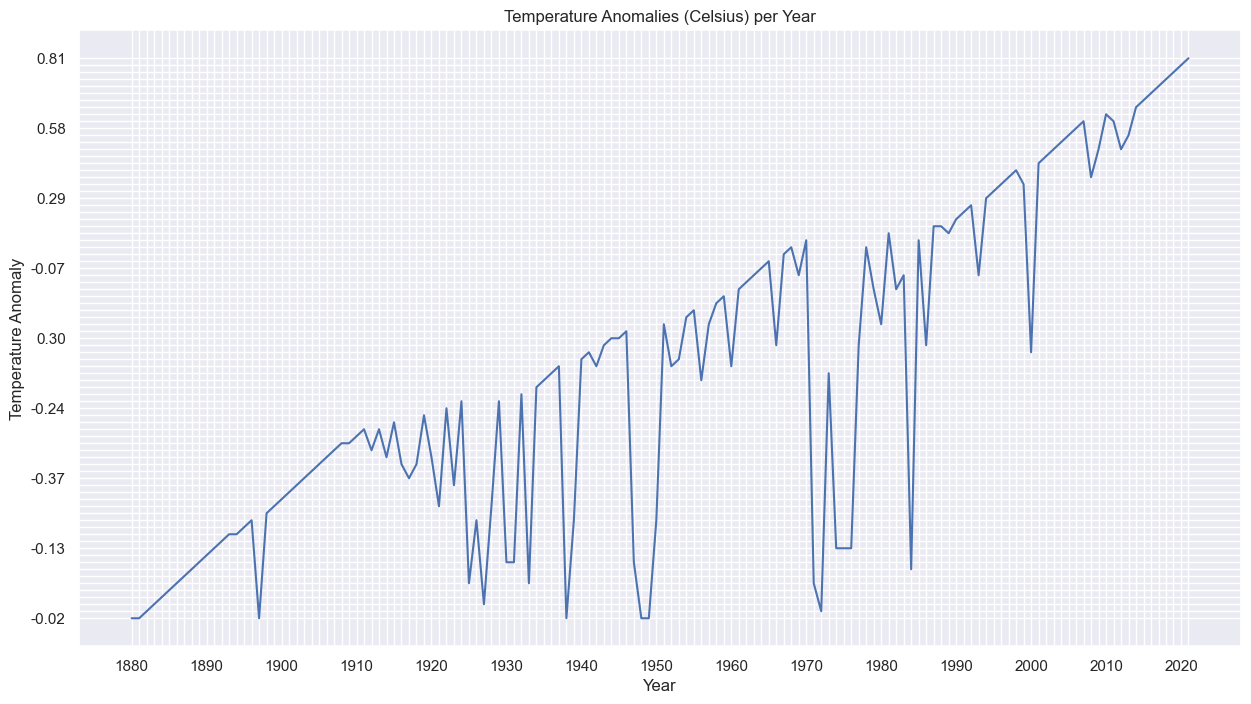

In [95]:
ax = sns.lineplot(data=temp_df, x='Year', y='Temperature Anomaly (Celsius)')
ax.invert_yaxis()
# clean up x tick labels
n = 10
[l.set_visible(False) for (i, l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

[l.set_visible(False) for (i, l) in enumerate(ax.yaxis.get_ticklabels()) if i % n != 0]

ax.set(title='Temperature Anomalies (Celsius) per Year')
plt.ylabel('Temperature Anomaly')

In [85]:
sl_pacific_df.describe()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3
count,1375.000000,440.000000,412.000000,324.000000,239.000000
mean,2008.306838,-0.266136,16.288204,36.626358,62.378745
std,7.762329,41.480897,41.266099,41.481886,41.591849
min,1992.961100,-82.380000,-62.330000,-37.090000,-15.820000
25%,2002.666550,-37.405000,-20.280000,2.210000,25.380000
50%,2009.030800,-8.480000,12.520000,32.560000,61.680000
75%,2014.202800,37.695000,53.420000,71.335000,98.180000
max,2022.605800,90.820000,112.270000,120.810000,152.480000


In [105]:
pacific_melt = pd.melt(sl_pacific_df, id_vars=['year'], value_vars=['TOPEX/Poseidon', 'Jason-1', 'Jason-2', 'Jason-3'])

,year,variable,value
0,1992.9611,TOPEX/Poseidon,19.62
1,1992.9865,TOPEX/Poseidon,-8.28
2,1993.0126,TOPEX/Poseidon,-16.68
3,1993.0408,TOPEX/Poseidon,-43.48
4,1993.0659,TOPEX/Poseidon,-61.18
...,...,...,...
5495,2022.5020,Jason-3,66.58
5496,2022.5291,Jason-3,91.58
5497,2022.5563,Jason-3,99.38
5498,2022.5835,Jason-3,99.38


<AxesSubplot: xlabel='year', ylabel='value'>

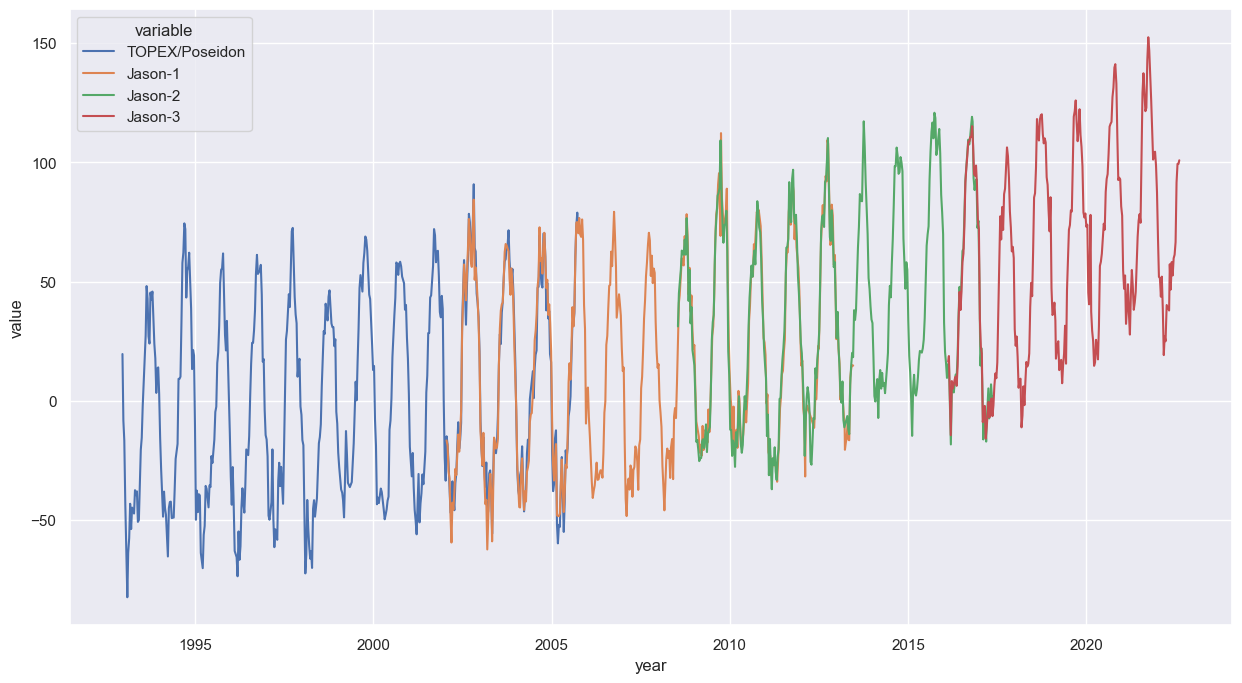

In [104]:
sns.lineplot(data=pacific_melt, x='year', y='value', hue='variable')

In [23]:
sl_atlantic_df.describe()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3
count,1378.000000,440.000000,412.000000,324.000000,239.000000
mean,2008.304722,1.203636,12.233932,25.926790,61.009874
std,7.759903,41.408170,41.442905,43.023959,41.412850
min,1992.962000,-79.420000,-66.960000,-64.380000,-19.360000
25%,2002.706150,-35.845000,-25.210000,-9.105000,24.790000
50%,2009.031450,-0.620000,10.440000,24.070000,58.240000
75%,2014.210300,37.205000,46.640000,65.870000,98.690000
max,2022.605700,90.480000,97.440000,108.820000,147.640000


Text(0, 0.5, 'Sea Level')

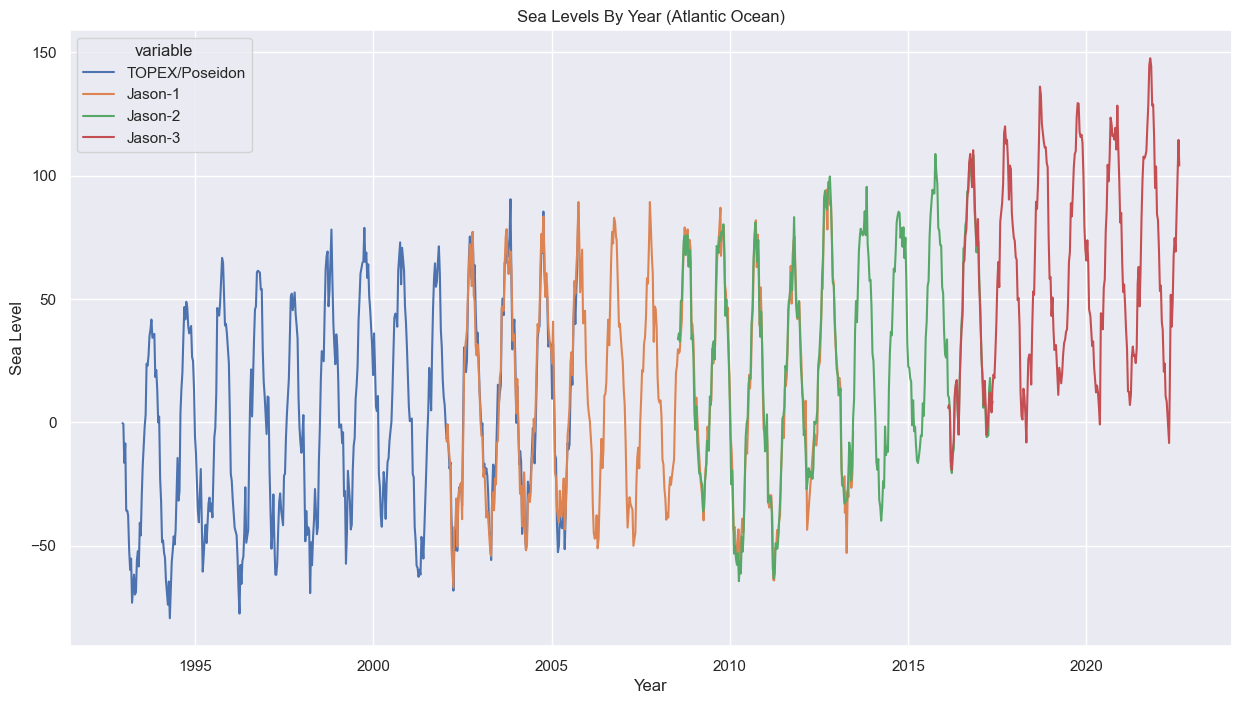

In [111]:
atlantic_melt = pd.melt(sl_atlantic_df, id_vars=['year'], value_vars=['TOPEX/Poseidon', 'Jason-1', 'Jason-2', 'Jason-3'])
ax = sns.lineplot(data=atlantic_melt, x='year', y='value', hue='variable')
ax.set(title='Sea Levels By Year (Atlantic Ocean)')
plt.xlabel('Year')
plt.ylabel('Sea Level')